<a href="https://colab.research.google.com/github/revendrat/FinancialMathematics/blob/main/Py_Finance_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#install yahoo finance
%pip install yfinance

     |████████████████████████████████| 6.4 MB 1.3 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
# import packages & modules
import pandas as pd
import numpy as np
import yfinance as yf
from pylab import mpl, plt

In [4]:
# suppress scientific notation
pd.options.display.float_format = '{:.5f}'.format

In [5]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [6]:
# Analyse Infosys stock
#define the ticker symbol
tickerSymbol = 'INFY.NS'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
infy = tickerData.history(period='1d', start='2017-1-1', end='2022-4-3')

#see your data
infy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1298 entries, 2017-01-02 to 2022-04-01
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1298 non-null   float64
 1   High          1298 non-null   float64
 2   Low           1298 non-null   float64
 3   Close         1298 non-null   float64
 4   Volume        1298 non-null   int64  
 5   Dividends     1298 non-null   float64
 6   Stock Splits  1298 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 81.1 KB


In [7]:
# verify the top 5 records
infy.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-01-02,442.13249,442.94147,436.99447,437.75970,2335222,0.00000,0.00000
2017-01-03,439.07149,439.42134,429.40764,434.58939,6778482,0.00000,0.00000
2017-01-04,435.11417,439.11528,433.88980,436.29483,7073586,0.00000,0.00000
2017-01-05,437.97833,441.43284,432.35931,435.59518,8207074,0.00000,0.00000
2017-01-06,435.04860,436.77583,423.30765,425.14423,14393448,0.00000,0.00000


In [8]:
# verify the bottom 5 records

infy.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-28,1866.00000,1880.90002,1852.65002,1873.90002,4008555,0.00000,0.00000
2022-03-29,1873.90002,1889.40002,1860.55005,1886.00000,3917785,0.00000,0.00000
2022-03-30,1910.00000,1919.00000,1895.00000,1903.94995,7795839,0.00000,0.00000
2022-03-31,1900.00000,1913.00000,1894.19995,1906.84998,5399145,0.00000,0.00000
2022-04-01,1886.84998,1910.30005,1878.30005,1903.55005,6171518,0.00000,0.00000


In [9]:
#pandas.Dataframe.shift(# lags)
#Using shift(1), we can get the row just above the present row. Here, # lags is 1.
#log() is a function given in numpy package in python. It calculates the natural log of the value given inside it.
infy['LogReturn'] = np.log(infy['Close']/infy['Close'].shift(1))

#print() function prints the value inside it on the console.
infy['LogReturn'].head()

Date
2017-01-02        NaN
2017-01-03   -0.00727
2017-01-04    0.00392
2017-01-05   -0.00160
2017-01-06   -0.02428
Name: LogReturn, dtype: float64

In [10]:
infy['LogReturn'].head()

Date
2017-01-02        NaN
2017-01-03   -0.00727
2017-01-04    0.00392
2017-01-05   -0.00160
2017-01-06   -0.02428
Name: LogReturn, dtype: float64

In [11]:
sma_180=180
infy['sma_180'] = infy['LogReturn'].rolling(sma_180).sum()

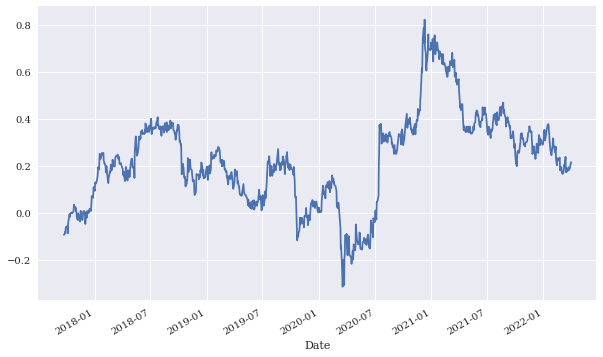

In [12]:
# plot the sma_180 against time
infy['sma_180'].plot(figsize=(10,6))

In [13]:
infy.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,LogReturn,sma_180
Date,,,,,,,,,
2017-01-02,442.13249,442.94147,436.99447,437.75970,2335222,0.00000,0.00000,NaN,NaN
2017-01-03,439.07149,439.42134,429.40764,434.58939,6778482,0.00000,0.00000,-0.00727,NaN
2017-01-04,435.11417,439.11528,433.88980,436.29483,7073586,0.00000,0.00000,0.00392,NaN
2017-01-05,437.97833,441.43284,432.35931,435.59518,8207074,0.00000,0.00000,-0.00160,NaN
2017-01-06,435.04860,436.77583,423.30765,425.14423,14393448,0.00000,0.00000,-0.02428,NaN


In [14]:
infy.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,LogReturn,sma_180
Date,,,,,,,,,
2022-03-28,1866.00000,1880.90002,1852.65002,1873.90002,4008555,0.00000,0.00000,-0.00141,0.19075
2022-03-29,1873.90002,1889.40002,1860.55005,1886.00000,3917785,0.00000,0.00000,0.00644,0.19565
2022-03-30,1910.00000,1919.00000,1895.00000,1903.94995,7795839,0.00000,0.00000,0.00947,0.20759
2022-03-31,1900.00000,1913.00000,1894.19995,1906.84998,5399145,0.00000,0.00000,0.00152,0.20773
2022-04-01,1886.84998,1910.30005,1878.30005,1903.55005,6171518,0.00000,0.00000,-0.00173,0.21568


In [15]:
infy.iloc[1]

Open               439.07149
High               439.42134
Low                429.40764
Close              434.58939
Volume         6778482.00000
Dividends            0.00000
Stock Splits         0.00000
LogReturn           -0.00727
sma_180                  NaN
Name: 2017-01-03 00:00:00, dtype: float64

In [16]:
# Verify random values of LogReturn and sma_180
infy[['LogReturn', 'sma_180']].iloc[175:185]

,LogReturn,sma_180
Date,,
2017-09-15,0.01761,NaN
2017-09-18,0.00094,NaN
2017-09-19,0.00346,NaN
2017-09-20,0.00049,NaN
2017-09-21,-0.00346,NaN
2017-09-22,-0.01245,-0.09314
2017-09-25,-0.00329,-0.08916
2017-09-26,0.01171,-0.08136
2017-09-27,-0.00676,-0.08651


In [17]:
# Build the strategy 
# Create the 'position' column that has strategy based on sum of last 180 days log returns with following criteria
# sma_180 >0 is Buy, < 0 is Sell & Na is No Position for trade
infy['position'] = np.where(infy['sma_180'].isna(), 'No Position', np.where(infy['sma_180'] > 0, 'Buy', 'Sell'))

In [18]:
# likewise create a column 'position indicator' that stores numeric values of strategy as mentioned below
# 1 is buy, -1 is sell & 0 is no position indicator
infy['position_indicator'] = np.where(infy['sma_180'].isna(), 0, np.where(infy['sma_180'] > 0, 1, -1))

In [19]:
# Verify random values of LogReturn, sma_180, position and position_indicator
infy[['LogReturn', 'sma_180', 'position', 'position_indicator']].iloc[175:185]

,LogReturn,sma_180,position,position_indicator
Date,,,,
2017-09-15,0.01761,NaN,No Position,0
2017-09-18,0.00094,NaN,No Position,0
2017-09-19,0.00346,NaN,No Position,0
2017-09-20,0.00049,NaN,No Position,0
2017-09-21,-0.00346,NaN,No Position,0
2017-09-22,-0.01245,-0.09314,Sell,-1
2017-09-25,-0.00329,-0.08916,Sell,-1
2017-09-26,0.01171,-0.08136,Sell,-1
2017-09-27,-0.00676,-0.08651,Sell,-1


In [20]:
infy['position'] = np.where(infy['sma_180'] >0, 'Buy', 'Sell')

In [21]:
infy[['LogReturn', 'sma_180', 'position']].iloc[175:185]

,LogReturn,sma_180,position
Date,,,
2017-09-15,0.01761,NaN,Sell
2017-09-18,0.00094,NaN,Sell
2017-09-19,0.00346,NaN,Sell
2017-09-20,0.00049,NaN,Sell
2017-09-21,-0.00346,NaN,Sell
2017-09-22,-0.01245,-0.09314,Sell
2017-09-25,-0.00329,-0.08916,Sell
2017-09-26,0.01171,-0.08136,Sell
2017-09-27,-0.00676,-0.08651,Sell


In [22]:
infy.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,LogReturn,sma_180,position,position_indicator
Date,,,,,,,,,,,
2017-01-02,442.13249,442.94147,436.99447,437.75970,2335222,0.00000,0.00000,NaN,NaN,Sell,0
2017-01-03,439.07149,439.42134,429.40764,434.58939,6778482,0.00000,0.00000,-0.00727,NaN,Sell,0
2017-01-04,435.11417,439.11528,433.88980,436.29483,7073586,0.00000,0.00000,0.00392,NaN,Sell,0
2017-01-05,437.97833,441.43284,432.35931,435.59518,8207074,0.00000,0.00000,-0.00160,NaN,Sell,0
2017-01-06,435.04860,436.77583,423.30765,425.14423,14393448,0.00000,0.00000,-0.02428,NaN,Sell,0


In [23]:
infy.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,LogReturn,sma_180,position,position_indicator
Date,,,,,,,,,,,
2022-03-28,1866.00000,1880.90002,1852.65002,1873.90002,4008555,0.00000,0.00000,-0.00141,0.19075,Buy,1
2022-03-29,1873.90002,1889.40002,1860.55005,1886.00000,3917785,0.00000,0.00000,0.00644,0.19565,Buy,1
2022-03-30,1910.00000,1919.00000,1895.00000,1903.94995,7795839,0.00000,0.00000,0.00947,0.20759,Buy,1
2022-03-31,1900.00000,1913.00000,1894.19995,1906.84998,5399145,0.00000,0.00000,0.00152,0.20773,Buy,1
2022-04-01,1886.84998,1910.30005,1878.30005,1903.55005,6171518,0.00000,0.00000,-0.00173,0.21568,Buy,1


In [24]:
infy['position_indicator'] = np.where(infy['sma_180'] >0, 1, -1)
infy[['LogReturn', 'sma_180', 'position', 'position_indicator']].iloc[175:185]

,LogReturn,sma_180,position,position_indicator
Date,,,,
2017-09-15,0.01761,NaN,Sell,-1
2017-09-18,0.00094,NaN,Sell,-1
2017-09-19,0.00346,NaN,Sell,-1
2017-09-20,0.00049,NaN,Sell,-1
2017-09-21,-0.00346,NaN,Sell,-1
2017-09-22,-0.01245,-0.09314,Sell,-1
2017-09-25,-0.00329,-0.08916,Sell,-1
2017-09-26,0.01171,-0.08136,Sell,-1
2017-09-27,-0.00676,-0.08651,Sell,-1


In [25]:
# rebalance every month
# send the data frame and date to rebalance
# if the position_indicator is negative (sum of 180 days log returns is negative) then change the strategy to sell.
# Otherwise, remain with past strategy
# Record the past and current strategy and return details on a rebalanced_strategy dataframeac
def rebalance(data, date):
  rebalanced_strategy = pd.DataFrame({'review_date':[], 'previous_position':[], 'rebalanced_position':[]})
  #df = pd.DataFrame(data)
  date = pd.to_datetime(date)
  temp_vals = data.loc[date]
  temp_rebalance = 'Buy'
  if (temp_vals['position_indicator'] < 1):
    temp_rebalance = 'Sell'
    print(" temp_rebalance ", temp_rebalance)
  temp_df = pd.DataFrame({'review_date':[date], 'previous_position':[temp_vals['position']], 'rebalanced_position':[temp_rebalance]})

  rebalanced_strategy = rebalanced_strategy.append(temp_df)
  print(" rebalanced_strategy ", rebalanced_strategy)

In [26]:
# test the rebalance strategy
rebalance(infy[['position', 'position_indicator']], '2017-09-27')

 temp_rebalance  Sell
 rebalanced_strategy    review_date previous_position rebalanced_position
0  2017-09-27              Sell                Sell


In [27]:
rebalance(infy[['position', 'position_indicator']], '2022-03-28')

 rebalanced_strategy    review_date previous_position rebalanced_position
0  2022-03-28               Buy                 Buy


In [28]:
# Comparing the results with buy & hold strategy of Infosys NSE
# Multiplies the position_indicator values with previous da log returns of Infosys NSE stock to avoid foresight bias
# Foresight bias implies that trade is placed given today's data, and returns are made on tomorrow
infy['strategy_sma180'] = infy['position_indicator'].shift(1)*infy['LogReturn']

# round the decimal to fourth place and verify the first 5 values
infy.round(4).head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,LogReturn,sma_180,position,position_indicator,strategy_sma180
Date,,,,,,,,,,,,
2017-01-02,442.13250,442.94150,436.99450,437.75970,2335222,0.00000,0.00000,NaN,NaN,Sell,-1,NaN
2017-01-03,439.07150,439.42130,429.40760,434.58940,6778482,0.00000,0.00000,-0.00730,NaN,Sell,-1,0.00730
2017-01-04,435.11420,439.11530,433.88980,436.29480,7073586,0.00000,0.00000,0.00390,NaN,Sell,-1,-0.00390
2017-01-05,437.97830,441.43280,432.35930,435.59520,8207074,0.00000,0.00000,-0.00160,NaN,Sell,-1,0.00160
2017-01-06,435.04860,436.77580,423.30770,425.14420,14393448,0.00000,0.00000,-0.02430,NaN,Sell,-1,0.02430


In [29]:

infy.round(4).head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,LogReturn,sma_180,position,position_indicator,strategy_sma180
Date,,,,,,,,,,,,
2017-01-02,442.13250,442.94150,436.99450,437.75970,2335222,0.00000,0.00000,NaN,NaN,Sell,-1,NaN
2017-01-03,439.07150,439.42130,429.40760,434.58940,6778482,0.00000,0.00000,-0.00730,NaN,Sell,-1,0.00730
2017-01-04,435.11420,439.11530,433.88980,436.29480,7073586,0.00000,0.00000,0.00390,NaN,Sell,-1,-0.00390
2017-01-05,437.97830,441.43280,432.35930,435.59520,8207074,0.00000,0.00000,-0.00160,NaN,Sell,-1,0.00160
2017-01-06,435.04860,436.77580,423.30770,425.14420,14393448,0.00000,0.00000,-0.02430,NaN,Sell,-1,0.02430


In [30]:
# Fetch the returns of buy & hold strategy and 180 days sum of log returns strategy
infy[['LogReturn', 'strategy_sma180']].sum()

LogReturn         1.46981
strategy_sma180   0.83846
dtype: float64

In [31]:
# Use anti-log(e) to get the returns value
np.exp(infy[['LogReturn', 'strategy_sma180']].sum())

LogReturn         4.34839
strategy_sma180   2.31281
dtype: float64

In [38]:
# Optimising the look back period with multiple iterations of past values of log returns

# import product module from itertools
from itertools import product
# select the random values for finding optimal values
sma1 = range(20, 61, 4)
sma2 = range(180, 201, 10)
# create results data frame
results = pd.DataFrame()

# write a for loop for different values of look back periods 
for SMA1, SMA2 in product(sma1, sma2):
  # create a temporary data frame
  data_opt = pd.DataFrame()
  # Drop all Nan & NaT values
  data_opt.dropna(inplace=True)
  # pass log returns of Infosys NSE to data_opt dataframe
  data_opt['Returns'] = infy['LogReturn'] 
  # Create log returns of Infosys NSE to data_opt dataframe
  data_opt['SMA1'] = data_opt['Returns'].rolling(SMA1).sum()
  data_opt['SMA2'] = data_opt['Returns'].rolling(SMA2).sum()
  # Drop all Nan & NaT values
  data_opt.dropna(inplace=True)
  # if sma1 look back period's sum of log returns is greater than sma2 look back period's sum of log returns, then buy, otherwise sell
  data_opt['Position'] = np.where(data_opt['SMA1'] > data_opt['SMA2'], 1, -1)
  # Drop all Nan & NaT values
  data_opt.dropna(inplace=True)
  # calculate the returns of strategy based sma1 greater than sma2 (foresight bias method)
  data_opt['Strategy'] = data_opt['Position'].shift(1) * data_opt['Returns']
  # Drop all Nan & NaT values
  data_opt.dropna(inplace=True)

  # calculate the performance of strategy
  perf = np.exp(data_opt[['Returns', 'Strategy']].sum())

  # create a dataframe with values of sma1, sma2 (look back periods, returns and strategy values)
  results = results.append(pd.DataFrame(
            {'SMA1': SMA1, 'SMA2': SMA2,
             'MARKET': perf['Returns'],
             'STRATEGY': perf['Strategy'],
             'OUT': perf['Strategy'] - perf['Returns']},
            index=[0]), ignore_index=True)

In [48]:
# Optimising the look back period with multiple iterations of past values of log returns

# import product module from itertools
from itertools import product
# select the random values for finding optimal values
sma1 = range(20, 61, 4)
#sma2 = range(180, 201, 10)
# create results data frame
results = pd.DataFrame()

# write a for loop for different values of look back periods 
for SMA1, SMA2 in product(sma1, sma2):
  # create a temporary data frame
  data_opt = pd.DataFrame()
  # Drop all Nan & NaT values
  data_opt.dropna(inplace=True)
  # pass log returns of Infosys NSE to data_opt dataframe
  data_opt['Returns'] = infy['LogReturn'] 
  # Create log returns of Infosys NSE to data_opt dataframe
  data_opt['SMA1'] = data_opt['Returns'].rolling(SMA1).sum()
  #data_opt['SMA2'] = data_opt['Returns'].rolling(SMA2).sum()
  # Drop all Nan & NaT values
  data_opt.dropna(inplace=True)
  # if sma1 look back period's sum of log returns is greater than 0 then buy, otherwise sell
  data_opt['Position'] = np.where(data_opt['SMA1'] >0, 1, -1)
  # Drop all Nan & NaT values
  data_opt.dropna(inplace=True)
  # calculate the returns of strategy based sma1 greater than sma2 (foresight bias method)
  data_opt['Strategy'] = data_opt['Position'].shift(1) * data_opt['Returns']
  # Drop all Nan & NaT values
  data_opt.dropna(inplace=True)

  # calculate the performance of strategy
  perf = np.exp(data_opt[['Returns', 'Strategy']].sum())

  # create a dataframe with values of sma1, sma2 (look back periods, returns and strategy values)
  results = results.append(pd.DataFrame(
            {'SMA1': SMA1, 
             'MARKET': perf['Returns'],
             'STRATEGY': perf['Strategy'],
             'OUT': perf['Strategy'] - perf['Returns']},
            index=[0]), ignore_index=True)

In [49]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMA1      33 non-null     int64  
 1   MARKET    33 non-null     float64
 2   STRATEGY  33 non-null     float64
 3   OUT       33 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.2 KB


In [50]:
results.sort_values('OUT', ascending=False).head(7)

,SMA1,MARKET,STRATEGY,OUT
3,24,4.65456,3.40348,-1.25107
4,24,4.65456,3.40348,-1.25107
5,24,4.65456,3.40348,-1.25107
23,48,4.20678,1.84705,-2.35973
22,48,4.20678,1.84705,-2.35973
21,48,4.20678,1.84705,-2.35973
29,56,4.22065,1.55118,-2.66946


In [51]:
results.head()

,SMA1,MARKET,STRATEGY,OUT
0,20,4.68789,1.87278,-2.81511
1,20,4.68789,1.87278,-2.81511
2,20,4.68789,1.87278,-2.81511
3,24,4.65456,3.40348,-1.25107
4,24,4.65456,3.40348,-1.25107


In [52]:
results.shape

(33, 4)

In [53]:
results

,SMA1,MARKET,STRATEGY,OUT
0,20,4.68789,1.87278,-2.81511
1,20,4.68789,1.87278,-2.81511
2,20,4.68789,1.87278,-2.81511
3,24,4.65456,3.40348,-1.25107
4,24,4.65456,3.40348,-1.25107
5,24,4.65456,3.40348,-1.25107
6,28,4.49569,1.21759,-3.27810
7,28,4.49569,1.21759,-3.27810
8,28,4.49569,1.21759,-3.27810
9,32,4.30113,1.22815,-3.07298


In [54]:
data_opt.head()

,Returns,SMA1,Position,Strategy
Date,,,,
2017-03-31,-0.00317,0.02818,1,-0.00317
2017-04-03,-0.01324,0.01101,1,-0.01324
2017-04-05,-0.01282,-0.00020,-1,-0.01282
2017-04-06,0.00366,0.02774,1,-0.00366
2017-04-07,-0.01822,0.01148,1,-0.01822


In [45]:
data_opt.tail()

,Returns,SMA1,SMA2,Position,Strategy
Date,,,,,
2022-03-28,-0.00141,-0.00620,0.29117,-1,0.00141
2022-03-29,0.00644,-0.00363,0.29594,-1,-0.00644
2022-03-30,0.00947,0.00855,0.29907,-1,-0.00947
2022-03-31,0.00152,0.00441,0.28485,-1,-0.00152
2022-04-01,-0.00173,0.00231,0.27288,-1,0.00173


In [55]:
 data_opt['Position'].shift(1) * data_opt['Returns']

Date
2017-03-31        NaN
2017-04-03   -0.01324
2017-04-05   -0.01282
2017-04-06   -0.00366
2017-04-07   -0.01822
               ...   
2022-03-28    0.00141
2022-03-29   -0.00644
2022-03-30   -0.00947
2022-03-31    0.00152
2022-04-01   -0.00173
Length: 1237, dtype: float64

In [56]:
results.sort_values('OUT', ascending=True).head(7)

,SMA1,MARKET,STRATEGY,OUT
8,28,4.49569,1.21759,-3.27810
6,28,4.49569,1.21759,-3.27810
7,28,4.49569,1.21759,-3.27810
9,32,4.30113,1.22815,-3.07298
11,32,4.30113,1.22815,-3.07298
10,32,4.30113,1.22815,-3.07298
15,40,4.24638,1.22693,-3.01945
